In [23]:

%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from ucimlrepo import fetch_ucirepo 

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, cross_val_score
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
Y = heart_disease.data.targets
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [24]:
#  decision trees, boosting family classifiers, logistic, and maybe SVMs


In [25]:
Y = (Y['num'] > 0).astype(float)

# If you need -1 instead of 0 for the negative class
Y[Y == 0] = -1

# Convert to numpy array and reshape to ensure it's a column vector
Y = Y.values.reshape(-1, 1)

In [26]:
X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)  

print(Y.shape)
print(X.shape)
print(X_and_Y[0])

(303, 1)
(303, 13)
[ 43.   1.   4. 110. 211.   0.   0. 161.   0.   0.   1.   0.   7.  -1.]


In [31]:
""" X_shuffled = X_and_Y[:,:13]
Y_shuffled = X_and_Y[:,13]
 """

from sklearn.model_selection import train_test_split, GridSearchCV
#import seaborn as sns

partitions = [0.2, 0.5, 0.8]

for partition in partitions:


    for trial in range(3):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=partition, random_state=0)

        D_list = [1, 2, 3, 4, 5]
        param_grid = {'max_depth':D_list}
        estimator = tree.DecisionTreeClassifier(criterion='entropy', random_state=1)

        grid_search = GridSearchCV(estimator, param_grid, cv=10, scoring="accuracy")

        grid_search.fit(X_train, Y_train)
        
        # Get best model and calculate accuracies
        train_acc = grid_search.score(X_train, Y_train)
        val_acc = grid_search.best_score_
        test_acc = grid_search.score(X_test, Y_test)
        
        # Print results for this trial directly
        print(f"Partition: {partition*100:.0f}/100, Trial: {trial+1}")
        print(f"Train Accuracy: {train_acc:.4f}")
        print(f"Validation Accuracy: {val_acc:.4f}")
        print(f"Test Accuracy: {test_acc:.4f}")

    

Partition: 20/100, Trial: 1
Train Accuracy: 0.8667
Validation Accuracy: 0.7500
Test Accuracy: 0.7160
Partition: 20/100, Trial: 2
Train Accuracy: 0.8667
Validation Accuracy: 0.7500
Test Accuracy: 0.7160
Partition: 20/100, Trial: 3
Train Accuracy: 0.8667
Validation Accuracy: 0.7500
Test Accuracy: 0.7160
Partition: 50/100, Trial: 1
Train Accuracy: 0.9073
Validation Accuracy: 0.7675
Test Accuracy: 0.7434
Partition: 50/100, Trial: 2
Train Accuracy: 0.9073
Validation Accuracy: 0.7675
Test Accuracy: 0.7434
Partition: 50/100, Trial: 3
Train Accuracy: 0.9073
Validation Accuracy: 0.7675
Test Accuracy: 0.7434
Partition: 80/100, Trial: 1
Train Accuracy: 0.8430
Validation Accuracy: 0.7772
Test Accuracy: 0.8361
Partition: 80/100, Trial: 2
Train Accuracy: 0.8430
Validation Accuracy: 0.7772
Test Accuracy: 0.8361
Partition: 80/100, Trial: 3
Train Accuracy: 0.8430
Validation Accuracy: 0.7772
Test Accuracy: 0.8361


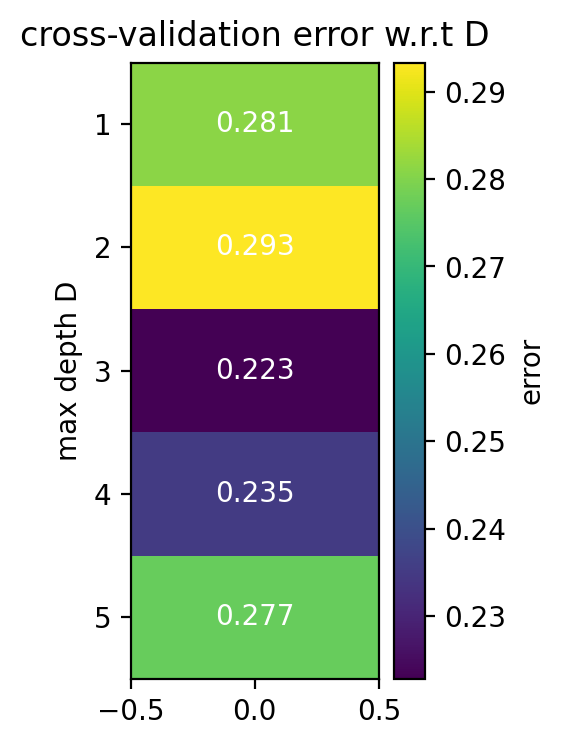

In [33]:
import matplotlib.pyplot as plt

def draw_heatmap(errors, D_list, title):
    plt.figure(figsize=(2, 4))
    plt.imshow(errors, cmap='viridis', aspect='auto')
    plt.colorbar(label='error')
    plt.yticks(range(len(D_list)), D_list)
    plt.ylabel('max depth D')
    plt.title(title)
    
    # Add text annotations
    for i in range(len(D_list)):
        for j in range(errors.shape[1]):
            plt.text(j, i, f'{errors[i, j]:.3f}', 
                     ha='center', va='center', color='white')
    
    plt.show()

# Use the function
cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1, 1)
draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')